## Importing Neccessary Libraries

In [ ]:
#IF YOU WANT TO RUN ON YOUR LOCAL GPU AND CHECK WHETHER IT IS WORKING
#import torch
#torch.cuda.is_available()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#import chart_studio.plotly as py
import plotly as pt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
# Now set up everything so that the figures show up in the notebook:
init_notebook_mode(connected=True)

## Read in the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/US_Accidents_Dec21_updated local.csv")
# create shortcut of the folder to your MyDrive for reading the data
# 40s with cPU
# 31s with T4-GPU {change local runtime and switch to it}

## Data Exploration (7 Steps)

In [ ]:
data.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

### Variable Identification

Dataset Description:
1-ID - This is a unique identifier of the accident record.

2-Severity - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

3-Start_Time - Shows start time of the accident in local time zone.

4-End_Time - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow

5-Start_Lat - Shows latitude in GPS coordinate of the start point.

6-Start_Lng - Shows longitude in GPS coordinate of the start point.

7-End_Lat - Shows latitude in GPS coordinate of the end point.

8-End_Lng - Shows longitude in GPS coordinate of the end point.

9-Distance(mi) - The length of the road extent affected by the accident.

10-Description - Shows natural language description of the accident.

11-Number - Shows the street number in address record.

12-Street - Shows the street name in address record.

13-Side - Shows the relative side of the street (Right/Left) in address record.

14-City - Shows the city in address record.

15-County - Shows the county in address record.

16-State - Shows the state in address record.

17-Zipcode - Shows the zipcode in address record.

18-Country - Shows the country in address record.

19-Timezone - Shows timezone based on the location of the accident (eastern, central, etc.).

20-Airport_Code - Denotes an airport-based weather station which is the closest one to location of the accident.

21-Weather_Timestamp - Shows the time-stamp of weather observation record (in local time).

22-Temperature(F) - Shows the temperature (in Fahrenheit).

23-Wind_Chill(F) - Shows the wind chill (in Fahrenheit).

24-Humidity(%) - Shows the humidity (in percentage).

25-Pressure(in) - Shows the air pressure (in inches).

26-Visibility(mi) - Shows visibility (in miles).

27-Wind_Direction - Shows wind direction.

28-Wind_Speed(mph) - Shows wind speed (in miles per hour).

29-Precipitation(in) - Shows precipitation amount in inches, if there is any.

30-Weather_Condition - Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

31-Amenity - A POI annotation which indicates presence of amenity in a nearby location.

32-Bump - A POI annotation which indicates presence of speed bump or hump in a nearby location.

33-Crossing - A POI annotation which indicates presence of crossing in a nearby location.

34-Give_Way - A POI annotation which indicates presence of give_way in a nearby location.

35-Junction - A POI annotation which indicates presence of junction in a nearby location.

36-No_Exit - A POI annotation which indicates presence of junction in a nearby location.

37-Railway - A POI annotation which indicates presence of railway in a nearby location.

38-Roundabout - A POI annotation which indicates presence of roundabout in a nearby location.

39-Station - A POI annotation which indicates presence of station in a nearby location.

40-Stop - A POI annotation which indicates presence of stop in a nearby location.

41-Traffic_Calming - A POI annotation which indicates presence of traffic_calming in a nearby location.

42-Traffic_Signal - A POI annotation which indicates presence of traffic_signal in a nearby location.

43-Turning_Loop - A POI annotation which indicates presence of turning_loop in a nearby location.

44-Sunrise_Sunset - Shows the period of day (i.e. day or night) based on sunrise/sunset.

45-Civil_Twilight - Shows the period of day (i.e. day or night) based on civil twilight.

46-Nautical_Twilight - Shows the period of day (i.e. day or night) based on nautical twilight.

47-Astronomical_Twilight - Shows the period of day (i.e. day or night) based on astronomical twilight.

We have identified "Severity" as the Target Variable and All other columns as the features/input variables

Rows = 2845341   &   Columns = 47

**NOTE**:
- 'Distance(mi)', 'End_Time' (we have start time), 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction.
- For 'Description', the POI features have already been extracted from it by dataset creators. Let's get rid of these features first.

- 'ID' doesn't provide any useful information about accidents themselves. ID doesnt matter as it is unique for each

- Also there are some columns which are of no use, like the columns 'Country','Timezone' we know we are doing analysis on only one country US. It is better to remove those columns:


In [ ]:
data['Description'][0]

'Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.'

### Univariate Analysis

#### For Numerical Features

In [ ]:
# Numerical Columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = data.select_dtypes(include=numerics)
print(list(numdf.columns))

['Severity', 'Start_Lat', 'Start_Lng', 'Number', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


In [ ]:
data.describe()

,Severity,Start_Lat,Start_Lng,Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


Avg Severity is 2, range 1 to 4, which should be a categorical feature not a numerical one

Also Pressure and Visibility- We can see that the minimum value is 0, meaning that some records are missing them and replaced them by putting zeros. For this reason, we are going to drop the records with missing values for these two columns.

In [ ]:
# Typecast to Categorical column in pandas
data['Severity'] = data['Severity'].astype(str)
# Dropping those values which are null by having 0 in pressure and visibility
data = data[data["Pressure(in)"] != 0]
data = data[data["Visibility(mi)"] != 0]

In [ ]:
data[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,2782905.00,2771558.00
mean,29.47,9.11
std,1.04,2.70
min,0.02,0.06
25%,29.31,10.00
50%,29.82,10.00
75%,30.01,10.00
max,58.90,140.00


Now Lets see the distribution of other numerical variables

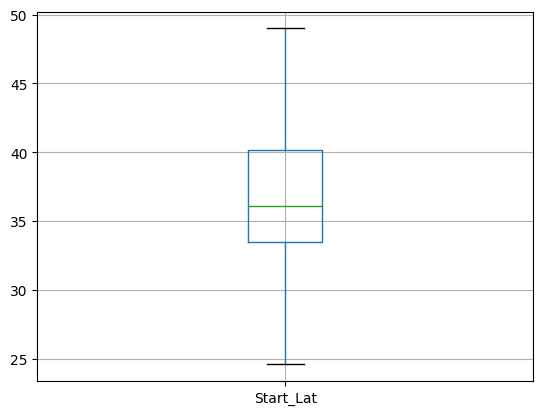

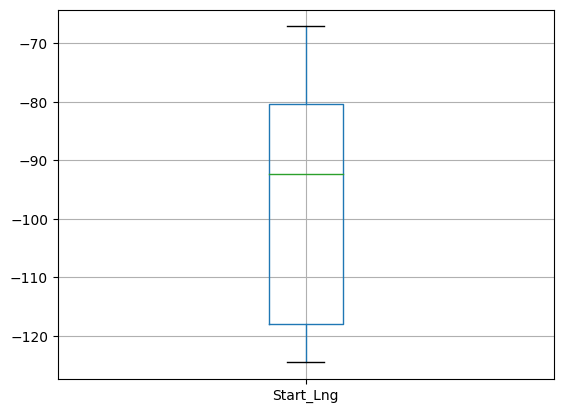

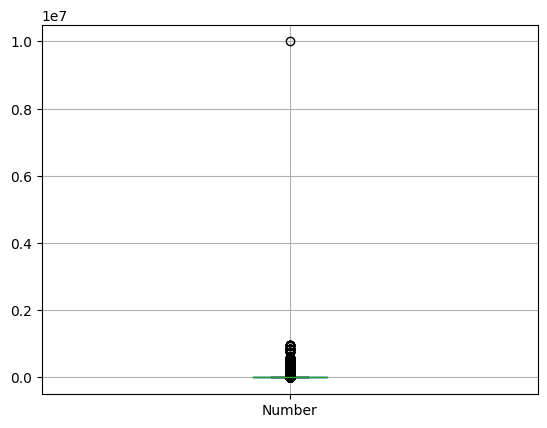

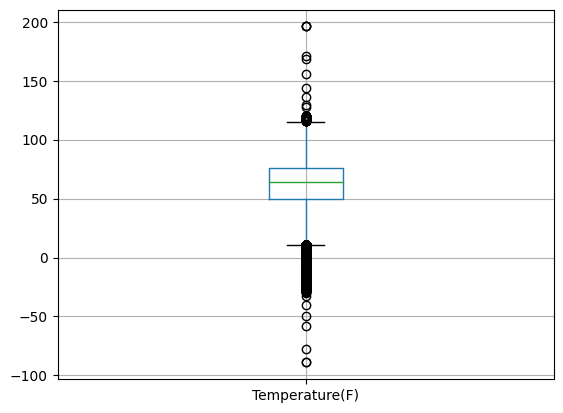

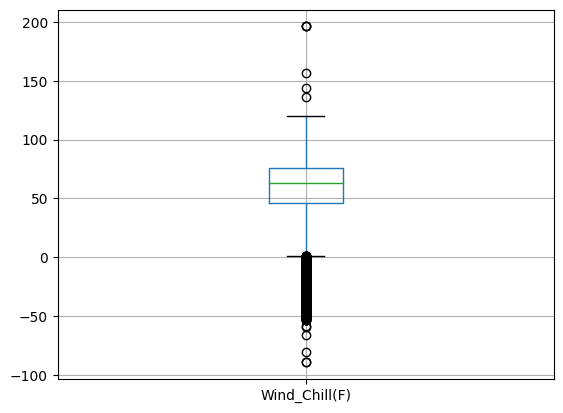

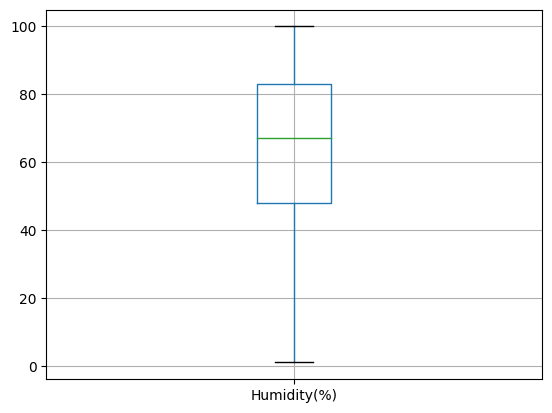

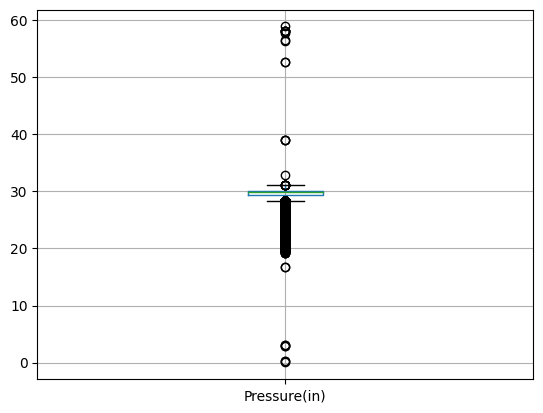

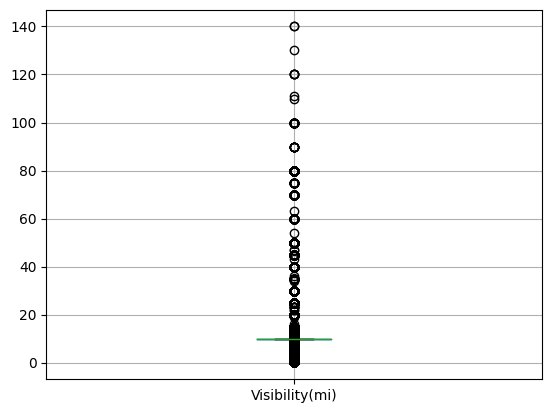

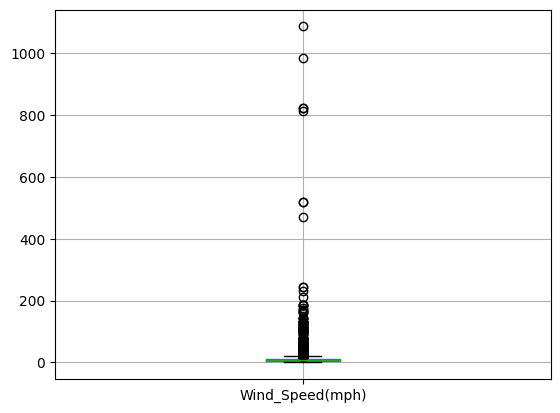

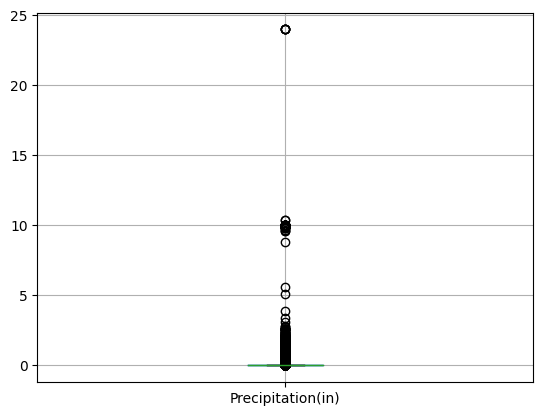

In [ ]:
num_col = ['Start_Lat', 'Start_Lng', 'Number', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
for column in num_col:
    plt.figure()
    data.boxplot([column])

There can be an outlier in precipitation. Will need to check this later

#### For Categorical Features

In [6]:
# Categorical Columns
cat_col = []
for column in data:
    if data[column].dtype == 'object':
        cat_col.append(column)

print(cat_col)

['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [ ]:
for column in cat_col:
  print(str(column) + " has " + str(data[column].nunique()) + " unique values\n")

Severity has 4 unique values

Start_Time has 1957842 unique values

Street has 159544 unique values

Side has 3 unique values

City has 11681 unique values

County has 1707 unique values

State has 49 unique values

Zipcode has 362759 unique values

Airport_Code has 2004 unique values

Weather_Timestamp has 473889 unique values

Wind_Direction has 24 unique values

Weather_Condition has 127 unique values

Sunrise_Sunset has 2 unique values

Civil_Twilight has 2 unique values

Nautical_Twilight has 2 unique values

Astronomical_Twilight has 2 unique values



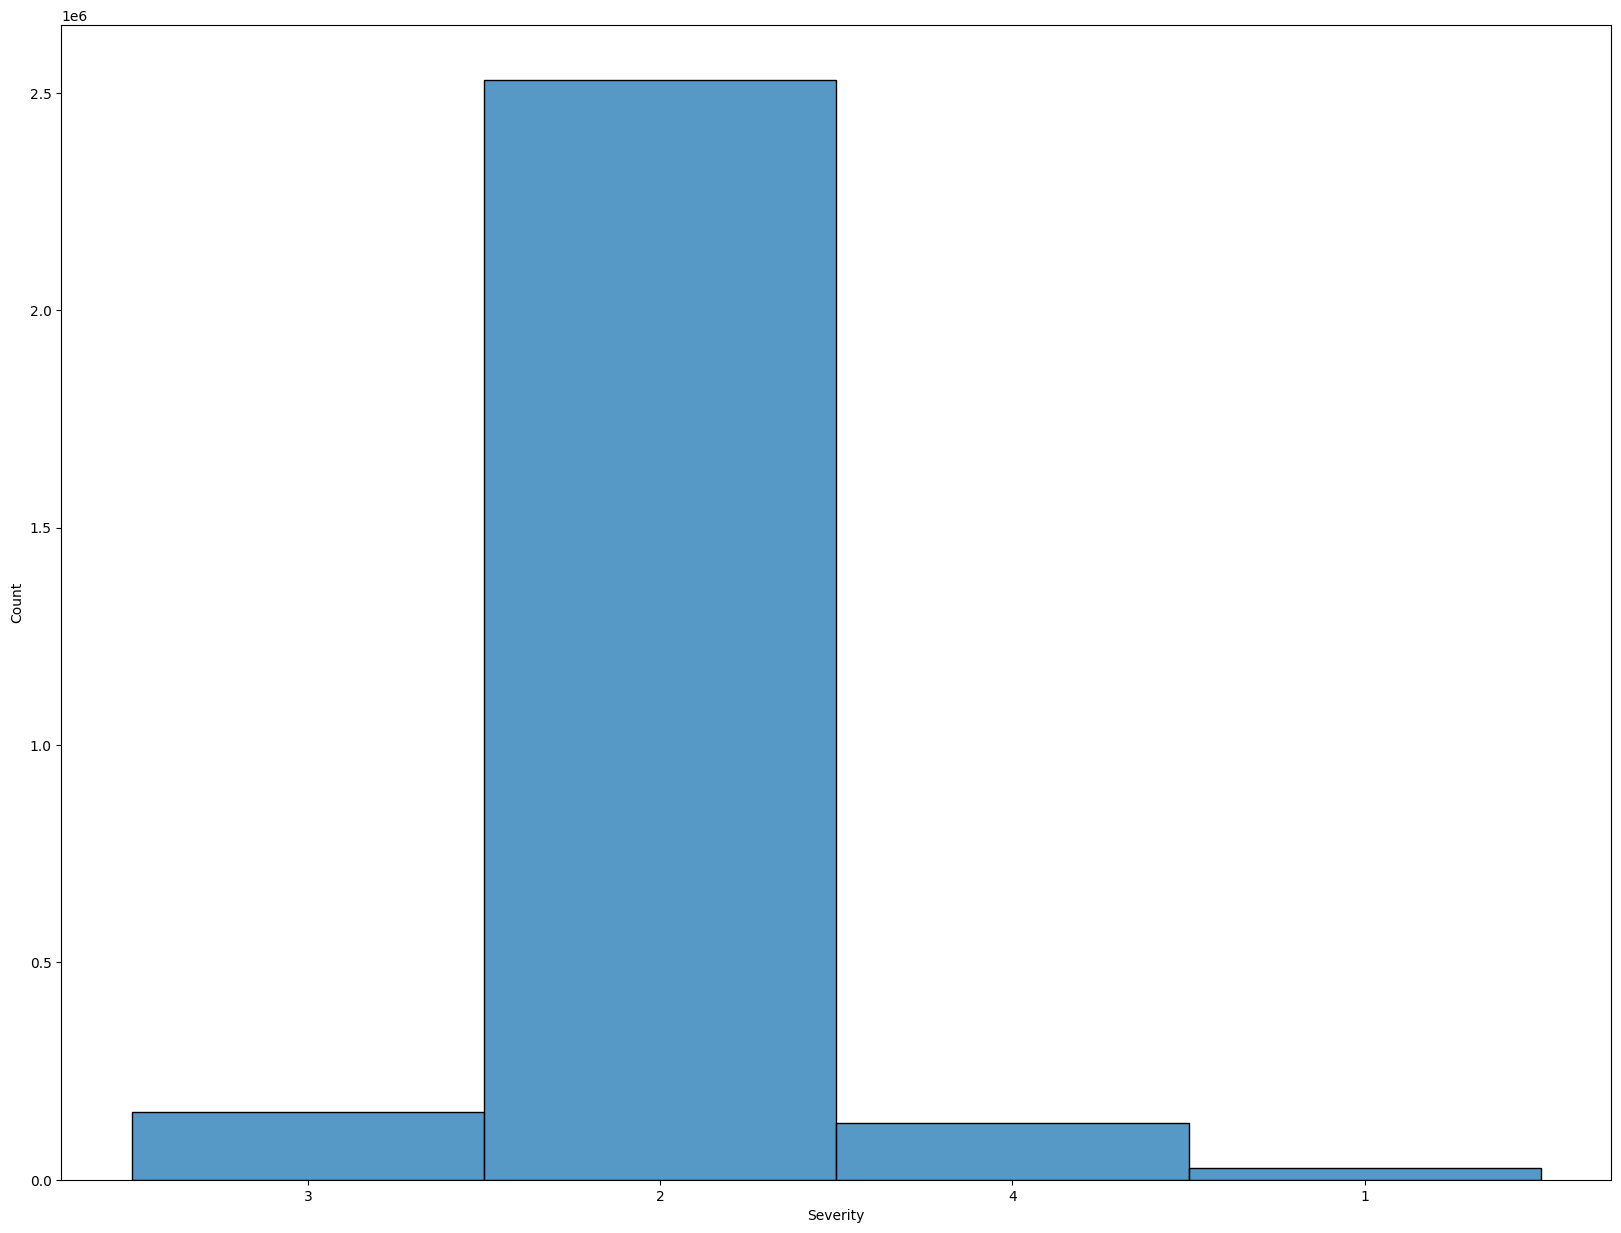

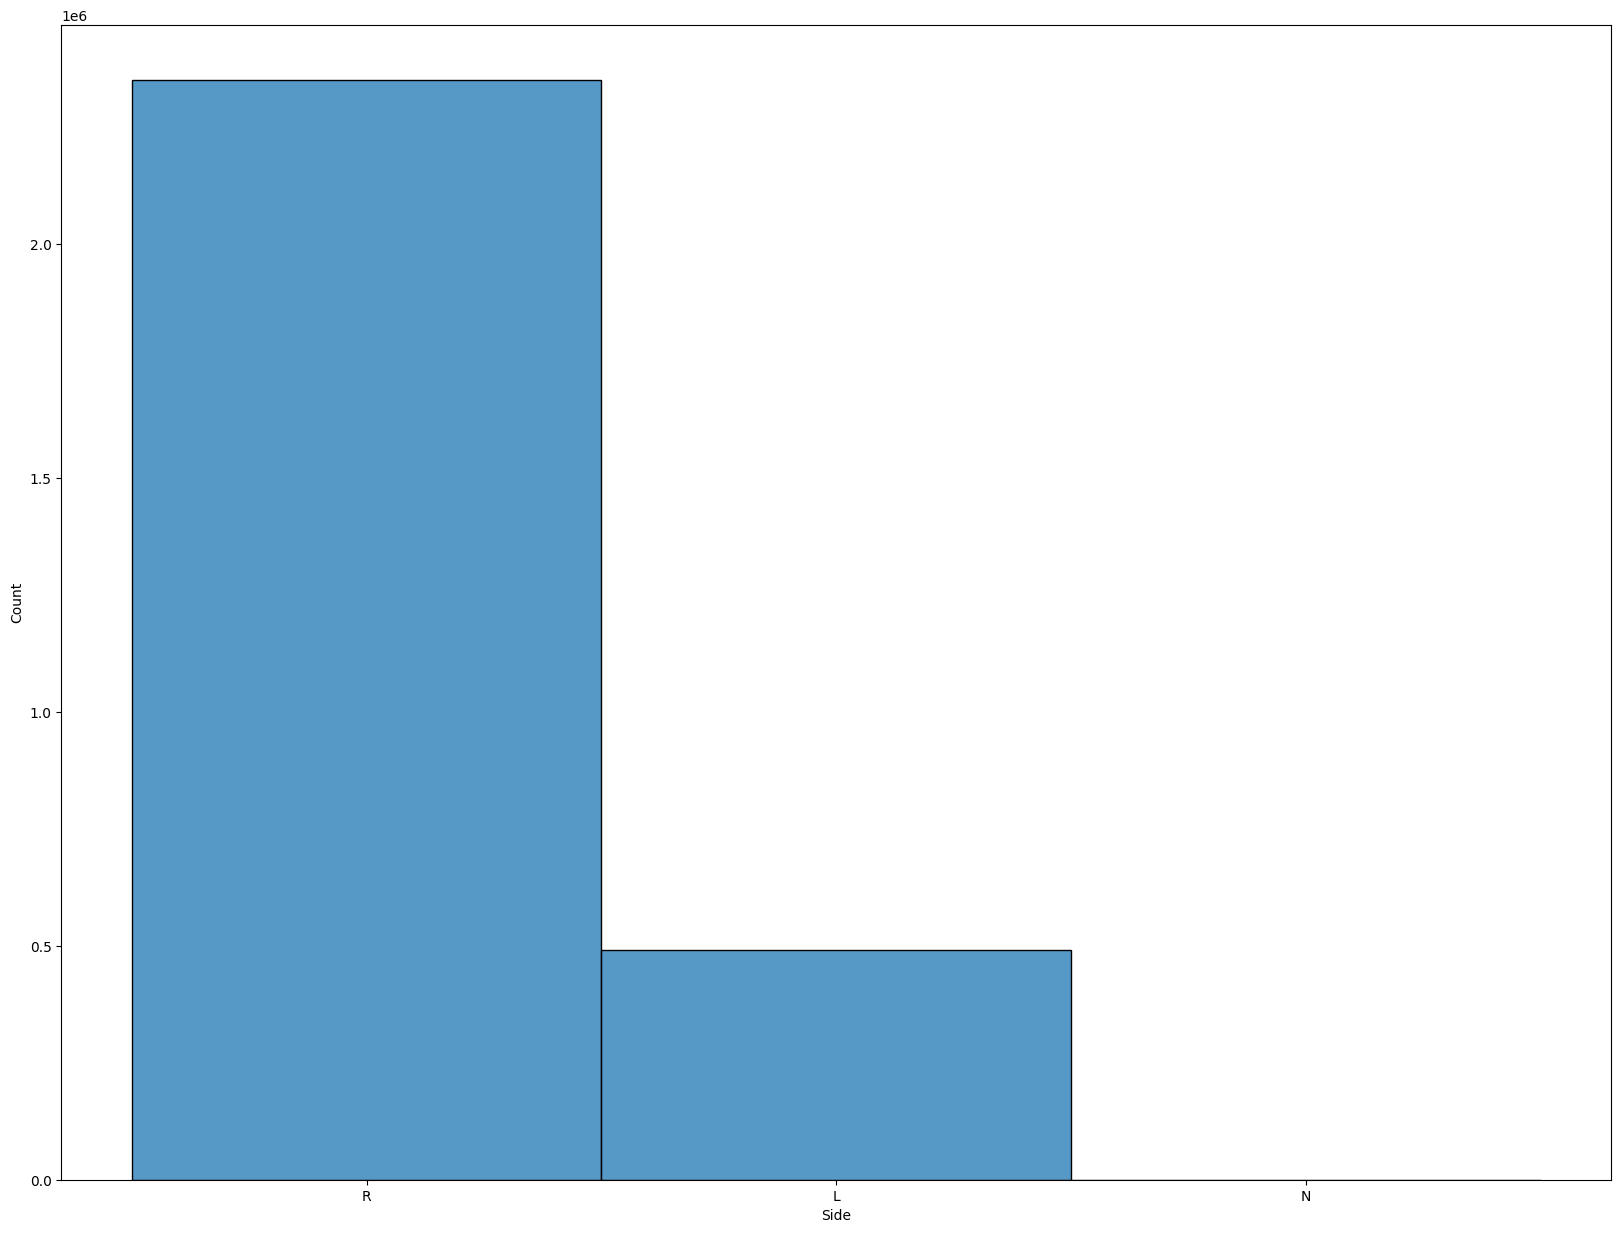

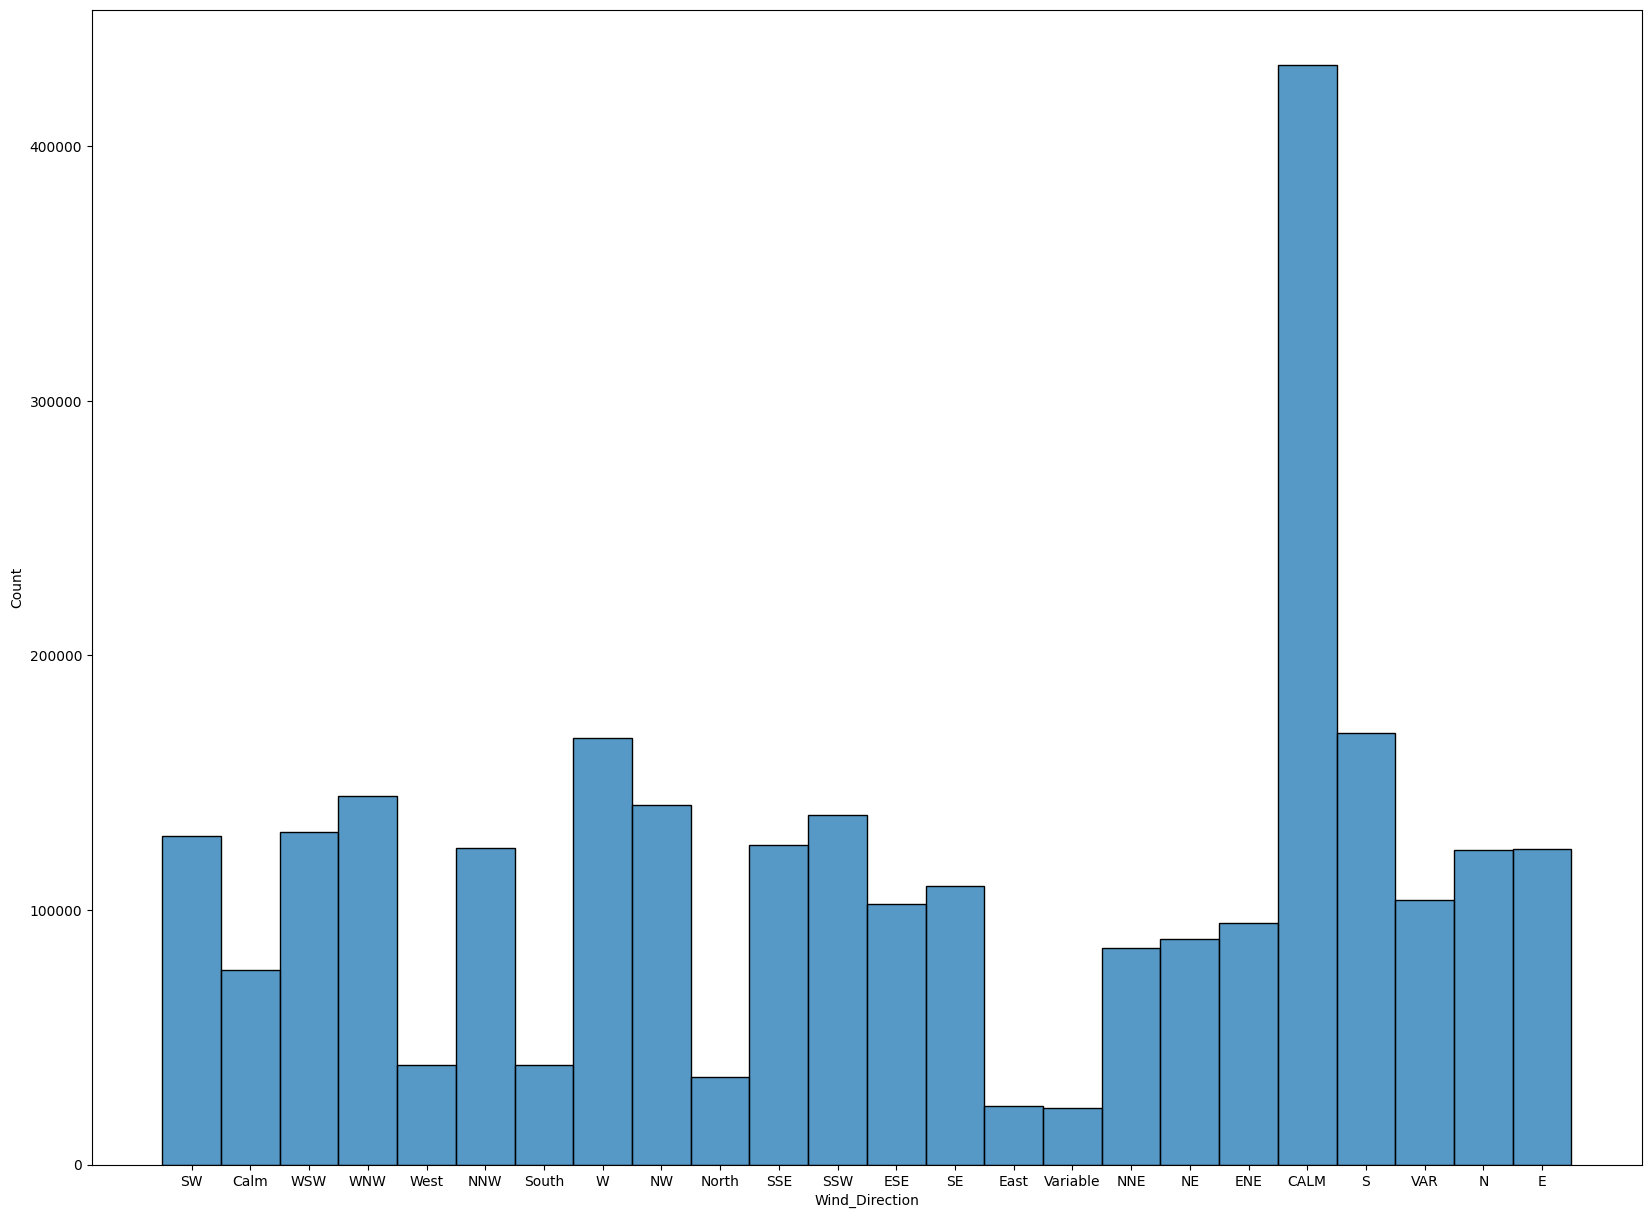

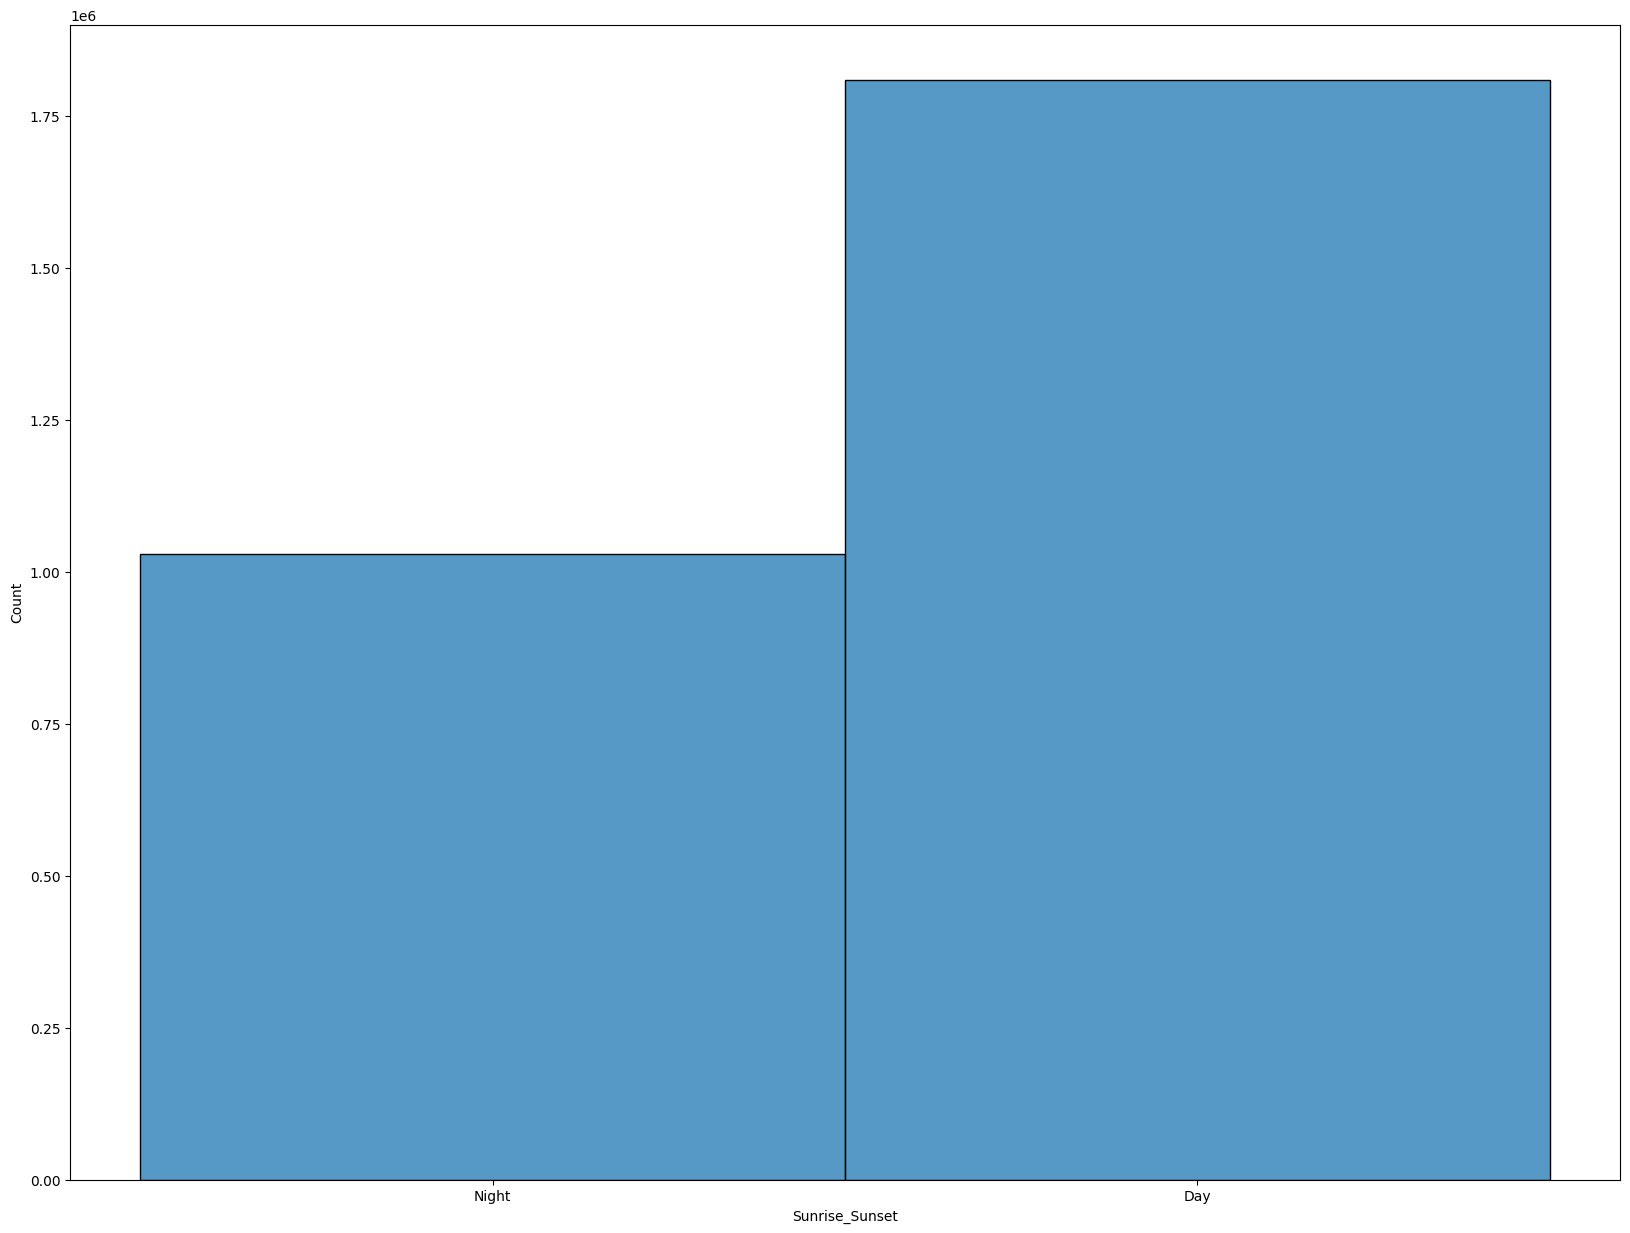

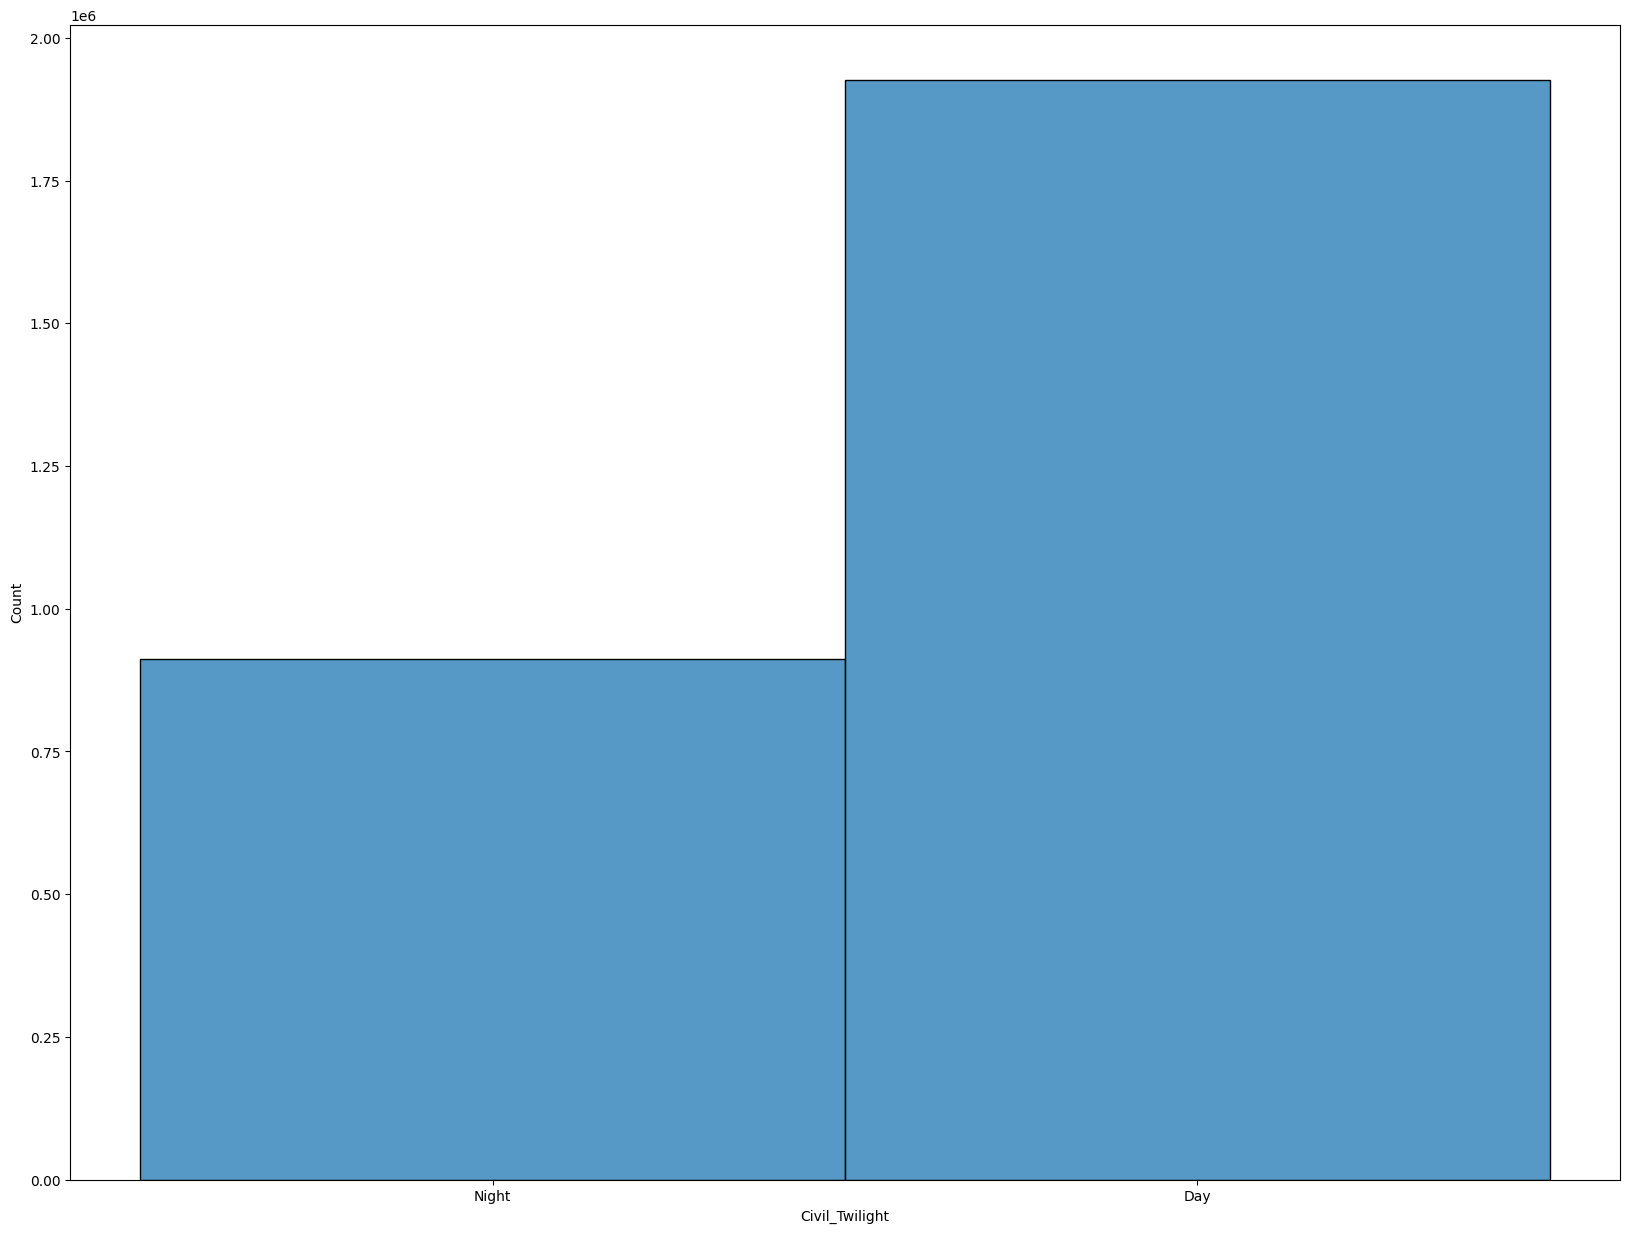

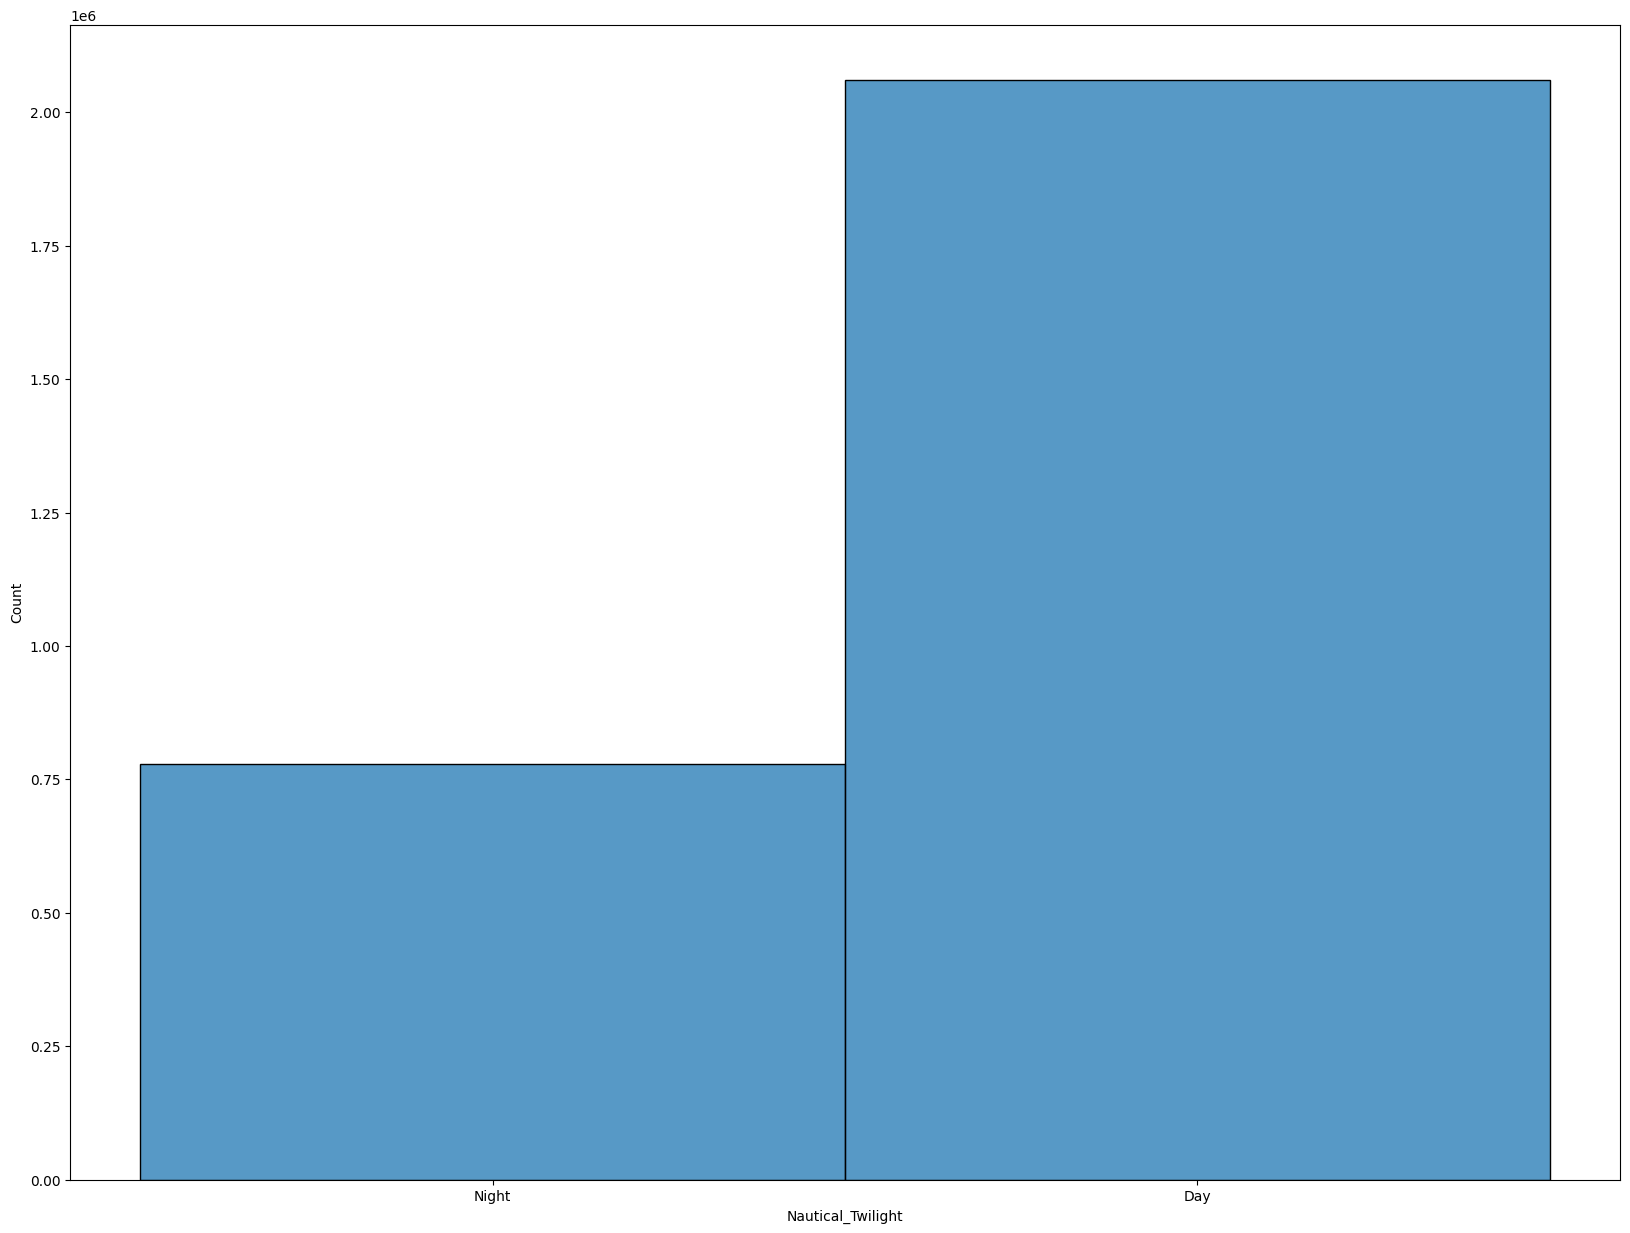

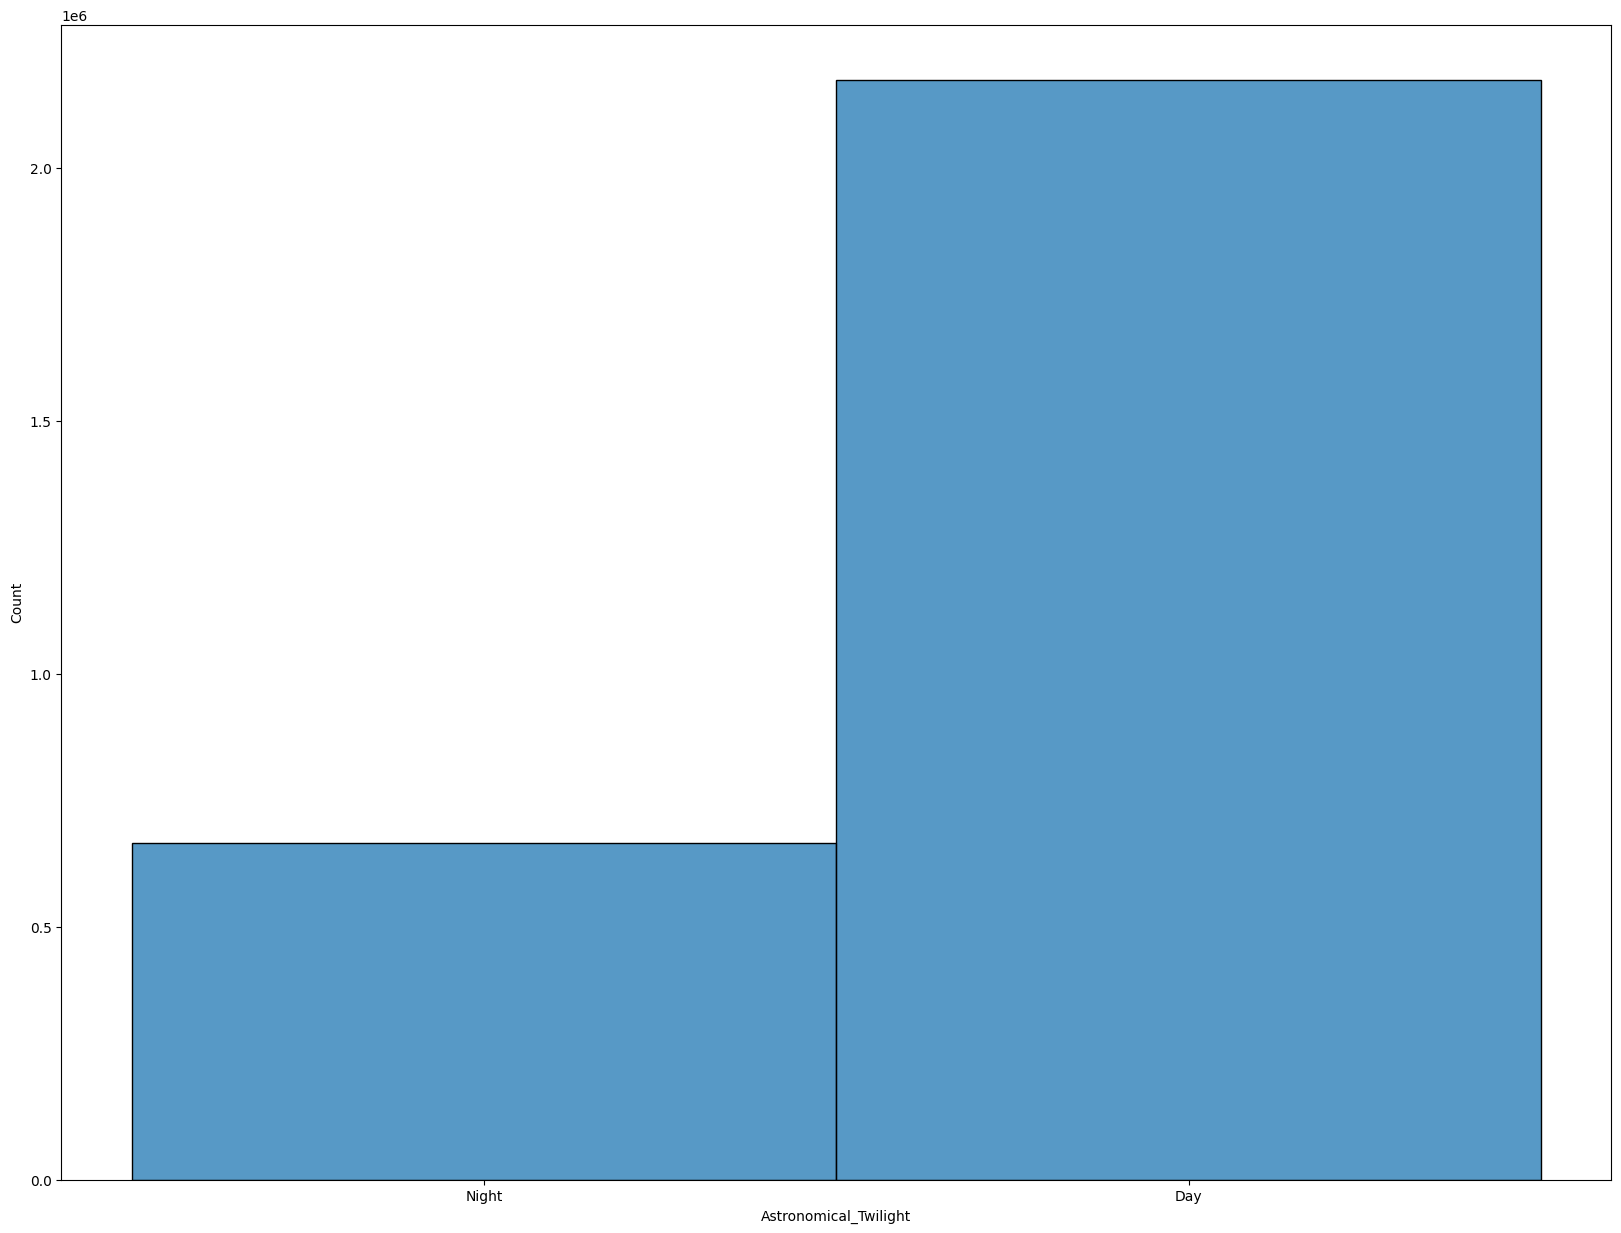

In [ ]:
# Seeing all the columns which have less that 25 categories
plot_col = ['Severity','Side','Wind_Direction','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
for column in plot_col:
  plt.figure(figsize=(20, 15))
  sns.histplot(data[column])

Last 4 Columns have only two values that are Day/Night {so we can transform them maybe by dummy variables}

Checking Weather Condition

In [ ]:
data["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [7]:
# To do so, we are going to replace them with a more generic description:
data.loc[data["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
data.loc[data["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
data.loc[data["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
data.loc[data["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
data.loc[data["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
data.loc[data["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
data.loc[data["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
data.loc[data["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
data.loc[data["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
data.loc[data["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
# This case we dont know, which we wll impute later.
data.loc[data["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(data["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


Let's check also the Wind_Direction field

In [8]:
print(data["Wind_Direction"].unique())

['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']


As we can see, we can group the values like we did with Weather_Condition:

In [9]:
data.loc[data["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
data.loc[data["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
data.loc[data["Wind_Direction"] == "East", "Wind_Direction"] = "E"
data.loc[data["Wind_Direction"] == "North", "Wind_Direction"] = "N"
data.loc[data["Wind_Direction"] == "South", "Wind_Direction"] = "S"
data.loc[data["Wind_Direction"] == "West", "Wind_Direction"] = "W"

data["Wind_Direction"] = data["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

data["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

Checking Side

In [ ]:
data["Side"].value_counts()

R    2350715
L     491387
N          1
Name: Side, dtype: int64

In [10]:
# Replacing this value, we will impute this later
data.loc[data["Side"] == "N", "Side"] = np.nan

Checking Weather Timestamp

In [ ]:
data[['Start_Time','Weather_Timestamp']]

,Start_Time,Weather_Timestamp
0,2016-02-08 00:37:08,2016-02-08 00:53:00
1,2016-02-08 05:56:20,2016-02-08 05:58:00
2,2016-02-08 06:15:39,2016-02-08 05:53:00
3,2016-02-08 06:51:45,2016-02-08 06:54:00
4,2016-02-08 07:53:43,2016-02-08 07:53:00
...,...,...
2845337,2019-08-23 18:03:25,2019-08-23 17:53:00
2845338,2019-08-23 19:11:30,2019-08-23 18:53:00
2845339,2019-08-23 19:00:21,2019-08-23 18:53:00
2845340,2019-08-23 19:00:21,2019-08-23 18:51:00


Now, lets check the states

In [11]:
print(data['State'].unique())
print(data['State'].nunique())

['OH' 'IN' 'KY' 'WV' 'MI' 'PA' 'CA' 'NV' 'MN' 'TX' 'MO' 'CO' 'OK' 'LA'
 'KS' 'WI' 'IA' 'MS' 'NE' 'ND' 'WY' 'SD' 'MT' 'NM' 'AR' 'IL' 'NJ' 'GA'
 'FL' 'NY' 'CT' 'RI' 'SC' 'NC' 'MD' 'MA' 'TN' 'VA' 'DE' 'DC' 'ME' 'AL'
 'NH' 'VT' 'AZ' 'UT' 'ID' 'OR' 'WA']
49


Ofcourse, Alaska is not there

Now Lets See Boolean Columns

In [12]:
# Boolean Columns
bool_col = []
for column in data:
    if data[column].dtype == 'bool':
        bool_col.append(column)
print(bool_col)

['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']


In [ ]:
for column in bool_col:
  print(data[column].value_counts())
  print("\n")

False    2814125
True       27978
Name: Amenity, dtype: int64


False    2841082
True        1021
Name: Bump, dtype: int64


False    2642025
True      200078
Name: Crossing, dtype: int64


False    2835246
True        6857
Name: Give_Way, dtype: int64


False    2551810
True      290293
Name: Junction, dtype: int64


False    2837809
True        4294
Name: No_Exit, dtype: int64


False    2819501
True       22602
Name: Railway, dtype: int64


False    2841980
True         123
Name: Roundabout, dtype: int64


False    2774134
True       67969
Name: Station, dtype: int64


False    2791864
True       50239
Name: Stop, dtype: int64


False    2840391
True        1712
Name: Traffic_Calming, dtype: int64


False    2576997
True      265106
Name: Traffic_Signal, dtype: int64


False    2842103
Name: Turning_Loop, dtype: int64




Checking Roundabout

In [ ]:
data[data['Roundabout']==True]['Severity'].value_counts()

2    114
4      5
3      2
1      2
Name: Severity, dtype: int64

Turning Loop doesnt matter as only has 1 value, so we can drop it,

Can we delete roundabout coz according to percentage?? Not sure. So lets leave it as it is.

In [13]:
# Turning Loop doesnt matter as it only has 1 value
data.drop(["Turning_Loop"],axis=1,inplace=True)


### Bivariate Analysis

<Axes: >

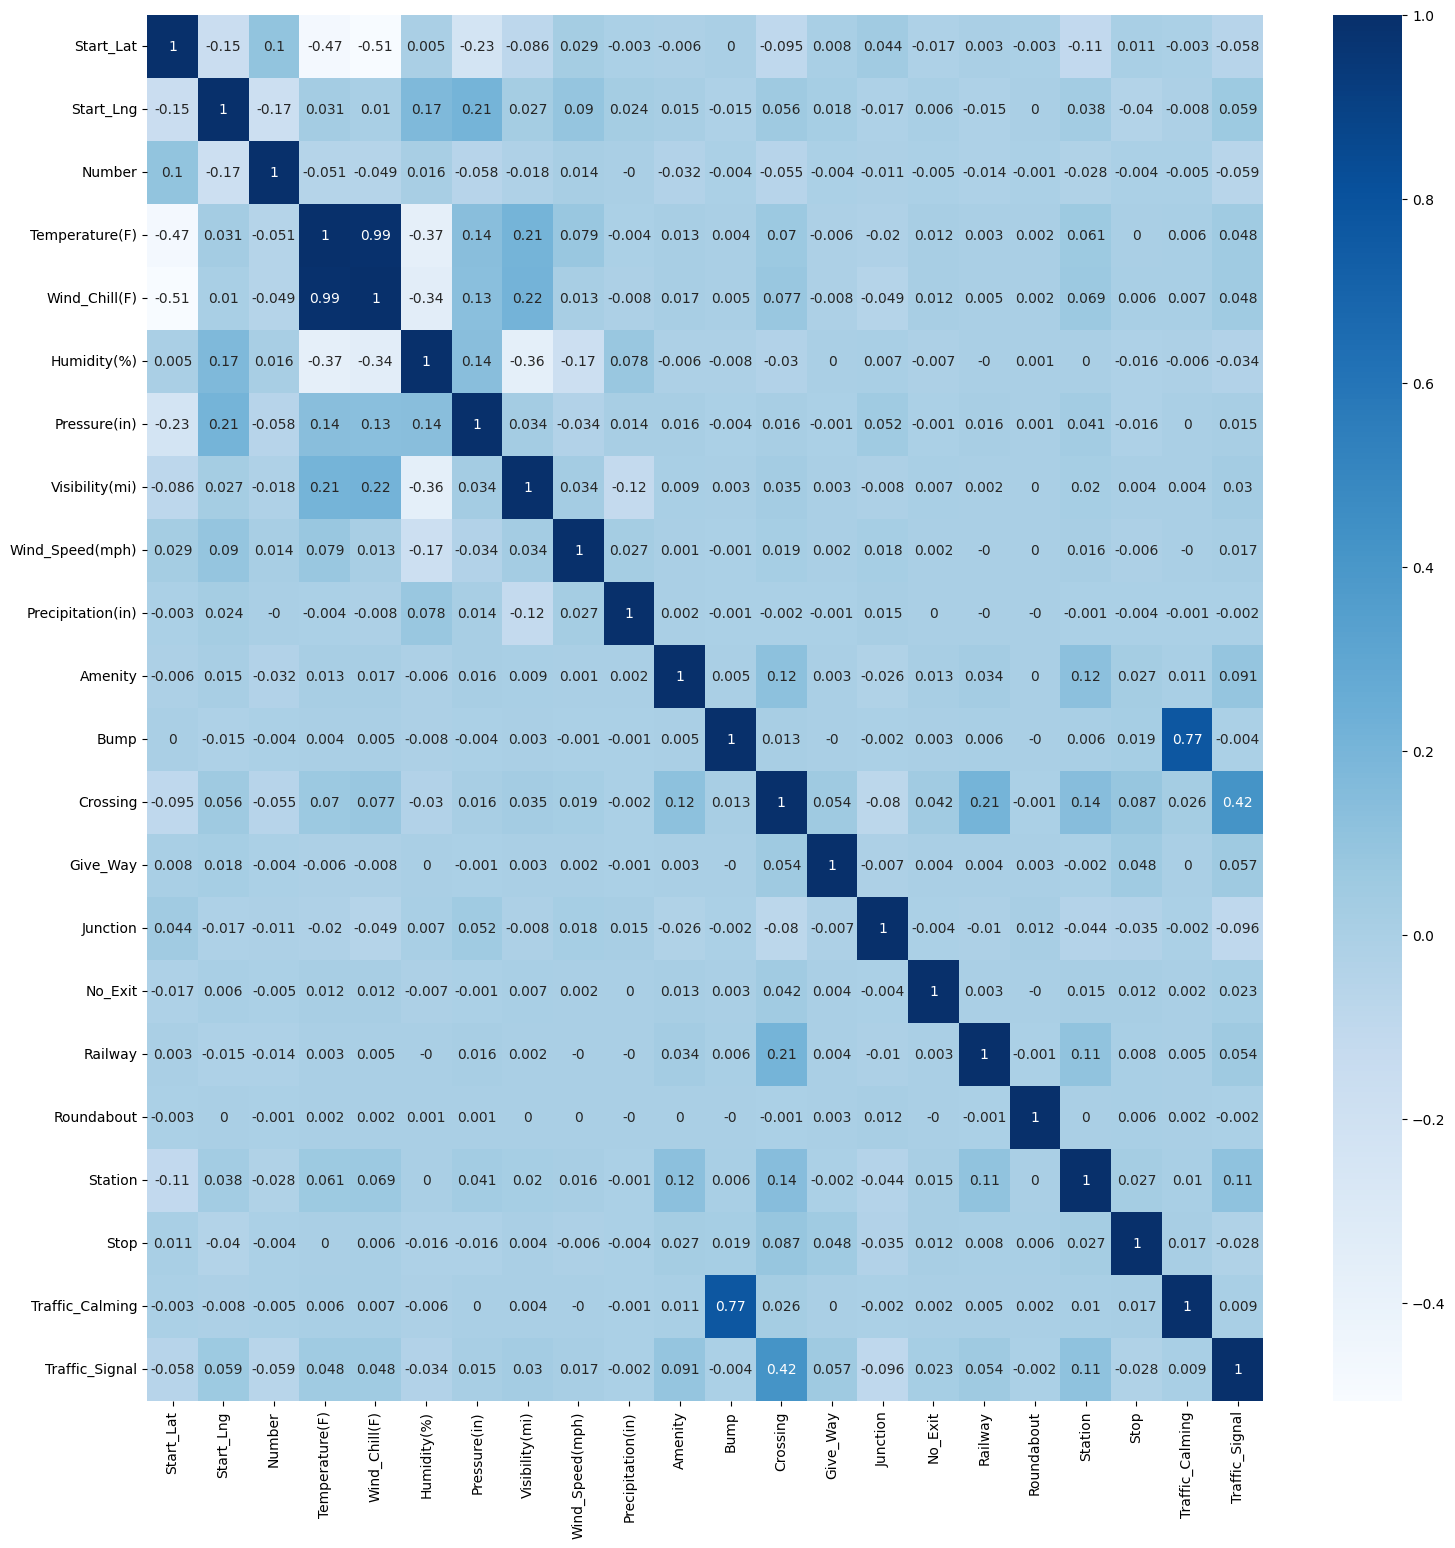

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(round(data.corr(),3), annot=True, cmap="Blues")

We can observe: -

'+'ve Relationship > 0.4
- Wind Chill and Temp
- Traffic Calming and bump
- Traffic Signal and Crossing

'-'ve Relationship < -0.4
- LAt with both Temp and Wind Chill

### Missing Values Treatment

In [ ]:
data.isna().sum()

Severity                       0
Start_Time                     0
Start_Lat                      0
Start_Lng                      0
Number                   1742337
Street                         2
Side                           1
City                         137
County                         0
State                          0
Zipcode                     1319
Airport_Code                9549
Temperature(F)             69252
Wind_Chill(F)             469558
Humidity(%)                73028
Pressure(in)               59198
Visibility(mi)             70545
Wind_Direction             73734
Wind_Speed(mph)           157898
Precipitation(in)         549292
Weather_Condition          71694
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop      

<Axes: >

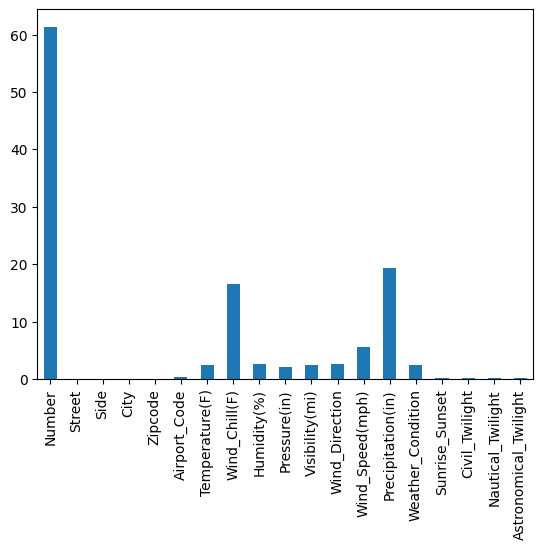

In [ ]:
# Columns having missing values with the percentage of missing values in each column
percentage_of_missing_values=data.isna().sum()/len(data)*100
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind="bar")

We need to adjust all these values/columns

In [ ]:
# As we can see in 'Number' column there is more 60% of the missing values. So Instead of filling the missing values it is better to remove this column.
data.drop(["Number"],axis=1,inplace=True)

#### Imputing the missing Values


In [14]:
# Numerical Features
# Replacing the null values with the medians of their repsective columns
data["Wind_Chill(F)"]=data["Wind_Chill(F)"].fillna(data["Wind_Chill(F)"].median())
data["Precipitation(in)"]=data["Precipitation(in)"].fillna(data["Precipitation(in)"].median())
data["Temperature(F)"]=data["Temperature(F)"].fillna(data["Temperature(F)"].median())
data["Humidity(%)"]=data["Humidity(%)"].fillna(data["Humidity(%)"].median())
data["Pressure(in)"]=data["Pressure(in)"].fillna(data["Pressure(in)"].median())
data["Visibility(mi)"]=data["Visibility(mi)"].fillna(data["Visibility(mi)"].median())
data["Wind_Speed(mph)"]=data["Wind_Speed(mph)"].fillna(data["Wind_Speed(mph)"].median())
data["Visibility(mi)"]=data["Visibility(mi)"].fillna(data["Visibility(mi)"].median())

In [15]:
# Catrgorical Features
data["Wind_Direction"]=data["Wind_Direction"].fillna(data["Wind_Direction"].mode()[0])
data["Weather_Condition"]=data["Weather_Condition"].fillna(data["Weather_Condition"].mode()[0])
data["Sunrise_Sunset"]=data["Sunrise_Sunset"].fillna(data["Sunrise_Sunset"].mode()[0])
data["Civil_Twilight"]=data["Civil_Twilight"].fillna(data["Civil_Twilight"].mode()[0])
data["Nautical_Twilight"]=data["Nautical_Twilight"].fillna(data["Nautical_Twilight"].mode()[0])
data["Astronomical_Twilight"]=data["Astronomical_Twilight"].fillna(data["Astronomical_Twilight"].mode()[0])
data["Side"]=data["Side"].fillna(data["Side"].mode()[0])

In [ ]:
data.isna().sum()

Severity                    0
Start_Time                  0
Start_Lat                   0
Start_Lng                   0
Street                      2
Side                        0
City                      137
County                      0
State                       0
Zipcode                  1319
Airport_Code             9549
Temperature(F)              0
Wind_Chill(F)               0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction              0
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Signal              0
Sunrise_Sunset              0
Civil_Twil

In [ ]:
# Imputing Street
data[data["Street"].isna()]

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
522562,2,2021-10-13 16:52:39,34.634919,-82.526744,NaN,R,Williamston,Anderson,SC,29697,...,False,False,False,False,False,False,Day,Day,Day,Day
1084708,2,2021-10-10 03:28:00.000000000,36.198129,-118.764696,NaN,R,Springville-Johnsondale,Tulare,CA,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night


We can find out these values by - Reverse Geocoding Convert Lat Long to Address
https://www.latlong.net/Show-Latitude-Longitude.html

In [ ]:
# Just checking there is any Joe Black Road present, just to verify
data.loc[data["Street"].str.contains("Joe Black", na=False), "Street"]

663277      Joe Black Rd
1093600     Joe Black Rd
1750848     Joe Black Rd
1753129     Joe Black Rd
1984527     Joe Black Rd
1985668     Joe Black Rd
Name: Street, dtype: object

In [ ]:
# set value at  522562th location for street column
data.at[522562, 'Street'] = 'Joe Black Rd'

In [ ]:
# Just checking there is any Bear Creek Drive present, just to verify
data.loc[data["Street"].str.contains("Bear Creek Dr", na=False), "Street"].value_counts()



 E South Bear Creek Dr    11
 Bear Creek Dr             5
 E North Bear Creek Dr     4
Name: Street, dtype: int64

In [16]:
# set value at  1084708th location for street column
data.at[1084708, 'Street'] = 'Bear Creek Dr'

In [17]:
# - City
#data[data["City"].isna()]["Street"].value_counts()
# OR
# - ZIPCODE
# - AIRPORT Code
# Impute the values for the columns above using relation with others...

#filling missing values with interpolate method
# limit is Maximum number of consecutive NaNs to fill. Must be greater than 0.
data.fillna(method='ffill', limit=5, inplace=True)
data.fillna(method='bfill', limit=5, inplace=True)

We will do these later after Project Progress Report

#### Checking for duplicates

In [18]:
print("Number of rows:", len(data.index))
data.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(data.index))

Number of rows: 2845342
Number of rows after drop of duplicates: 2845342


### Outlier Treatment

In [ ]:
data.describe()["Precipitation(in)"]

count    2.666559e+06
mean     5.668219e-03
std      8.602202e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.400000e+01
Name: Precipitation(in), dtype: float64

In [ ]:
data[data["Precipitation(in)"] > 11]["Precipitation(in)"]

490652     24.0
1662088    24.0
1941275    24.0
2020071    24.0
2417673    24.0
Name: Precipitation(in), dtype: float64

In [ ]:
data[data["Precipitation(in)"] > 11][["Severity","Street"]]

,Severity,Street
490652,2,I-95 N
1662088,2,I-44 E
1941275,2,I-65 N
2020071,2,AL-8
2417673,2,Beach Blvd


I think we should leave the outliers as it is
OR
We can change it to 10 or remove these values

### Variable Transformation

In [19]:
# Last 4 Columns of Type Object - Can be Converted using dummy
df = pd.get_dummies(data[["Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"]], drop_first=True)
# Converting to dictionary so that when we concatenate it to our oirignal dataframe, no datatype hange occurs due to missing values
df = df.to_dict()

In [20]:
# Appending df to our original dataset and removing the columns ["Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"]
data.drop(["Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"],axis=1,inplace=True)

In [21]:
data = data.assign(**df)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845342 entries, 0 to 2845341
Data columns (total 46 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ID                           object 
 1   Severity                     int64  
 2   Start_Time                   object 
 3   End_Time                     object 
 4   Start_Lat                    float64
 5   Start_Lng                    float64
 6   End_Lat                      float64
 7   End_Lng                      float64
 8   Distance(mi)                 float64
 9   Description                  object 
 10  Number                       float64
 11  Street                       object 
 12  Side                         object 
 13  City                         object 
 14  County                       object 
 15  State                        object 
 16  Zipcode                      object 
 17  Country                      object 
 18  Timezone                     object 
 19  

In [23]:
# Convert boolean columns to 0 and 1

data['Amenity']  = data['Amenity'].astype(int)
data['Bump']     = data['Bump'].astype(int)
data['Crossing'] = data['Crossing'].astype(int)
data['Give_Way'] = data['Give_Way'].astype(int)
data['Junction'] = data['Junction'].astype(int)
data['No_Exit'] = data['No_Exit'].astype(int)
data['Railway'] = data['Railway'].astype(int)
data['Roundabout'] = data['Roundabout'].astype(int)
data['Station'] = data['Station'].astype(int)
data['Stop'] = data['Stop'].astype(int)
data['Traffic_Calming'] = data['Traffic_Calming'].astype(int)
data['Traffic_Signal'] = data['Traffic_Signal'].astype(int)


### Variable Creation

In [24]:
# The year of the datetime.
data["year"]=pd.DatetimeIndex(data["Start_Time"]).year

# The month as January=1, December=12.
data["month"]=pd.DatetimeIndex(data["Start_Time"]).month

data["Weekday"] = pd.to_datetime(data["Start_Time"]).dt.weekday

data["Hour"] = pd.to_datetime(data["Start_Time"]).dt.hour

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845342 entries, 0 to 2845341
Data columns (total 50 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ID                           object 
 1   Severity                     int64  
 2   Start_Time                   object 
 3   End_Time                     object 
 4   Start_Lat                    float64
 5   Start_Lng                    float64
 6   End_Lat                      float64
 7   End_Lng                      float64
 8   Distance(mi)                 float64
 9   Description                  object 
 10  Number                       float64
 11  Street                       object 
 12  Side                         object 
 13  City                         object 
 14  County                       object 
 15  State                        object 
 16  Zipcode                      object 
 17  Country                      object 
 18  Timezone                     object 
 19  

-----

DONT RUN THIS CELL BLOCK, UNLESS YOU WANT TO UPDATE THE CLEAN DATASET.
I WILL COMMENT IT OUT FOR RIGHT NOW.

In [26]:
data.to_csv('/content/drive/MyDrive/US_accidents_tableau', index=False)